# E-tivity 3: Clustering and Manifold Learning
### MSc in AI - CE6002 & CS5062 
Student Name: Michel Danjou

Student ID: 18263461

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

# Import Python Modules

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score

# Task 1
  * Watch the StatQuest: MDS and PCoA video (also linked in module material section below). Note that the columns/cells in this video are the observations and the data rows/genes are the attributes.
  * Watch the video k-Means Clustering Algorithm (also linked in the module material section below).
  * Download the dataset loans_dataset_et3.csv. This is a subset of the loans dataset used in the example notebooks for E-tivity1 and E-tivity2 which has only the examples with loan status Yes and preselected features. 
  * Follow the examples in the notebook Lab 3 - Clustering and Manifold Learning.ipynb to cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering. Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters (max 250 words).

## 1.1 Load and scale the data

In the next cell we will be performing the following operations:
  * load the csv file into a panda dataset.
  * convert the data to a Numpy array
  * scale the data fro the Numpy array

In [3]:
# Load the data
df = pd.read_csv("loans_dataset_et3.csv")  
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [4]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [5]:
# Convert data to np array
df_data = np.array(df.values, dtype=float)

# Scale the data
min_max_scaler = preprocessing.MinMaxScaler()
df_data = min_max_scaler.fit_transform(df_data)

#### Investigate the effect of scaling on the dataset
The graph below hightlights the fact that the scaling preserved the shape of the data. 

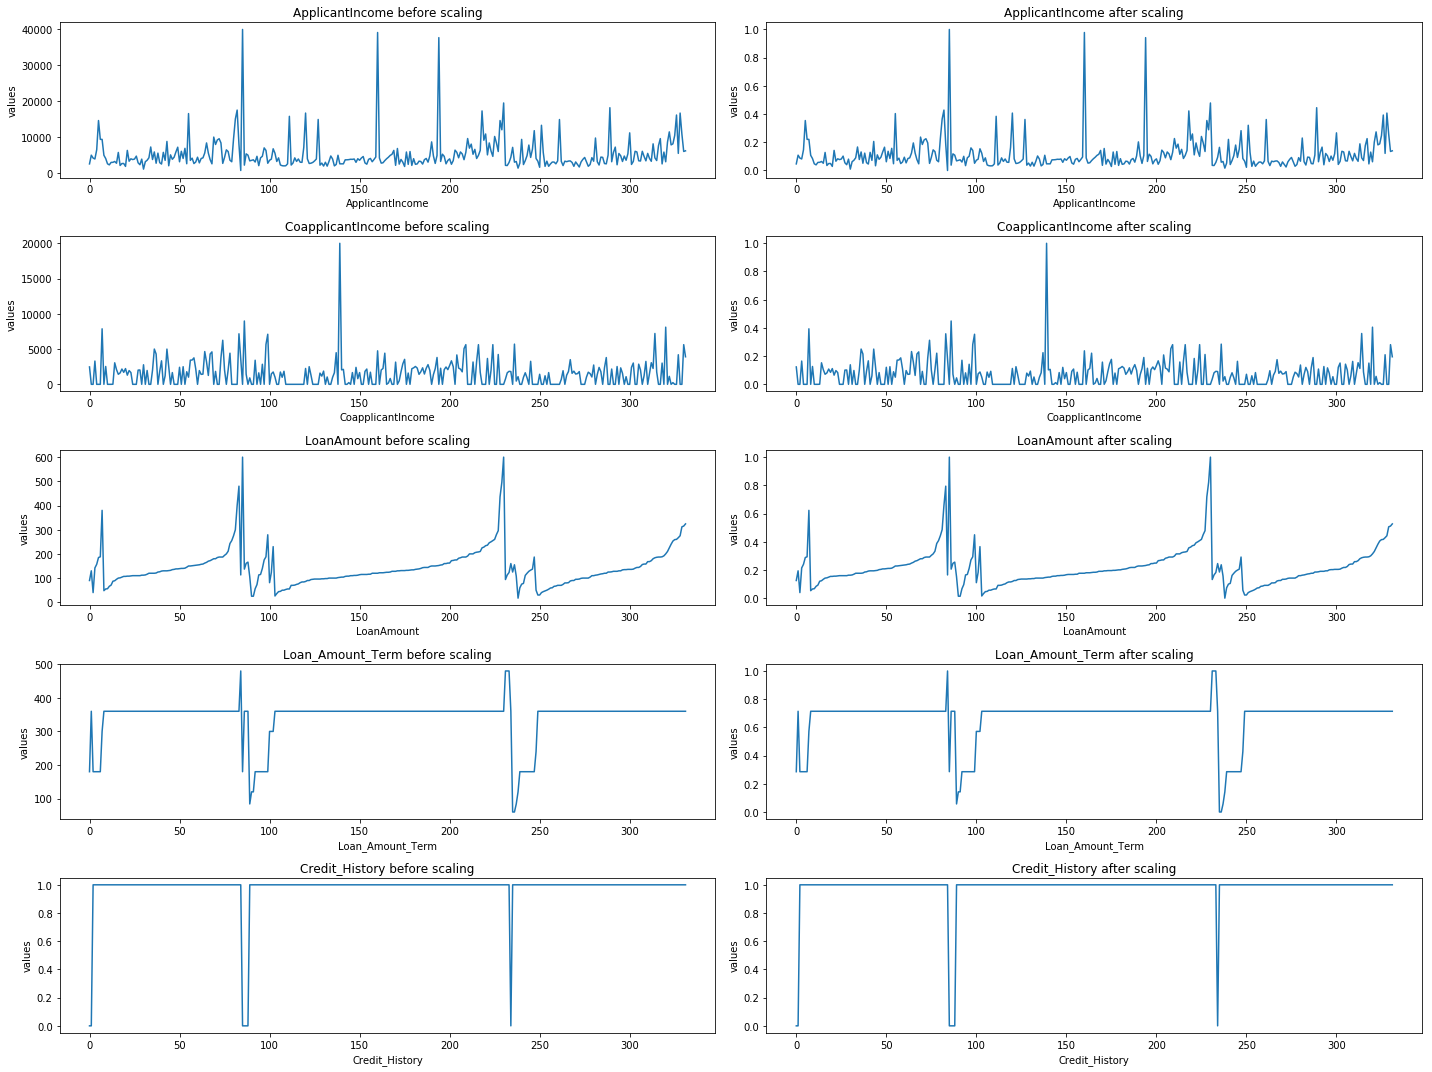

In [6]:
f, axs = plt.subplots(5, 2, figsize=(20, 15))
col_names = df.columns.values.tolist()

for i in range(5):
    
    plt.subplot(5, 2, 2*i+1)
    plt.plot(df.iloc[:,i])
    plt.xlabel(col_names[i])
    plt.ylabel('values')
    plt.title(col_names[i] + " before scaling")

    plt.subplot(5, 2, 2*i+2)
    plt.plot(df_data[:,i])
    plt.xlabel(col_names[i])
    plt.ylabel('values')
    plt.title(col_names[i] + " after scaling")

plt.tight_layout()
plt.show()

#### Search for correlated features by displaying the coorelation matrix
The correlation matrix below shows that the `LoanAmount` is correlated to the `ApplicantIncome` and to a lesser extend to the `CoapplicantIncome`

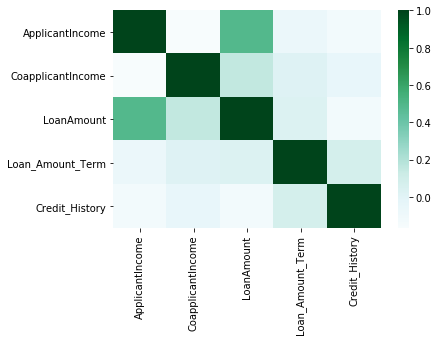

In [7]:
sns.heatmap(df.corr(), cmap='BuGn')

# 1.2  Clustering and Manifold

In [8]:
# Scatter plot
colors = np.array(['orange', 'blue', 'lime', 'grey', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

## KMeans clustering

In [9]:
max_nb_cluters = 10

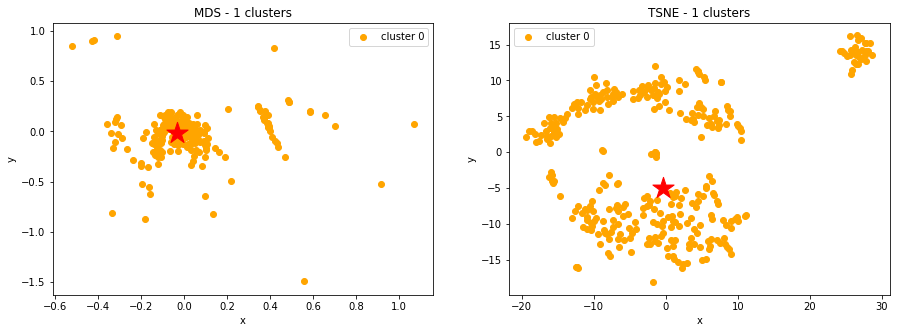

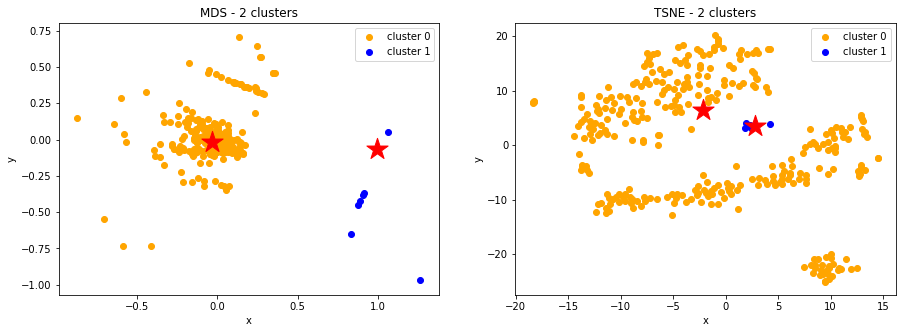

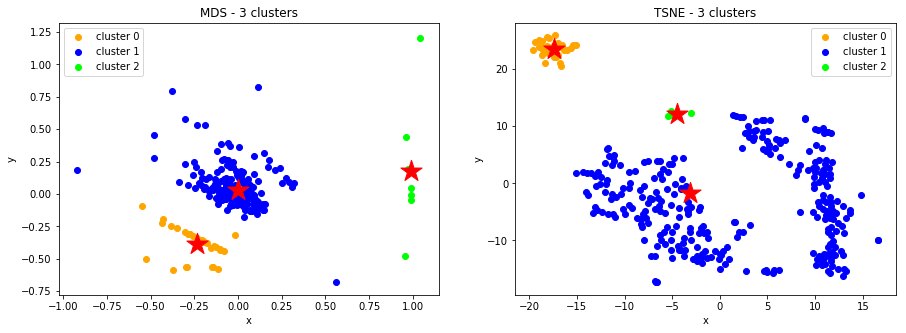

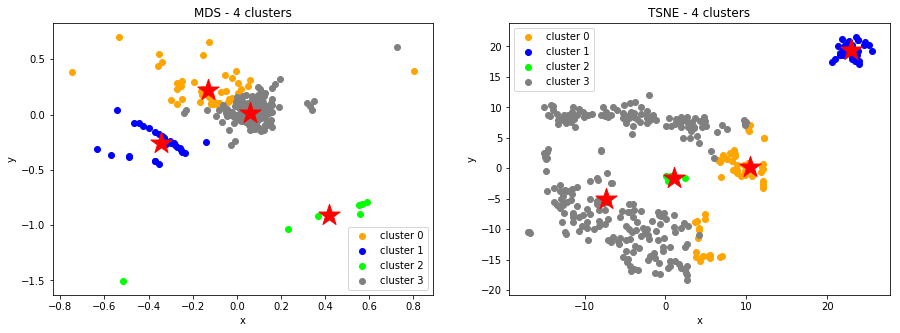

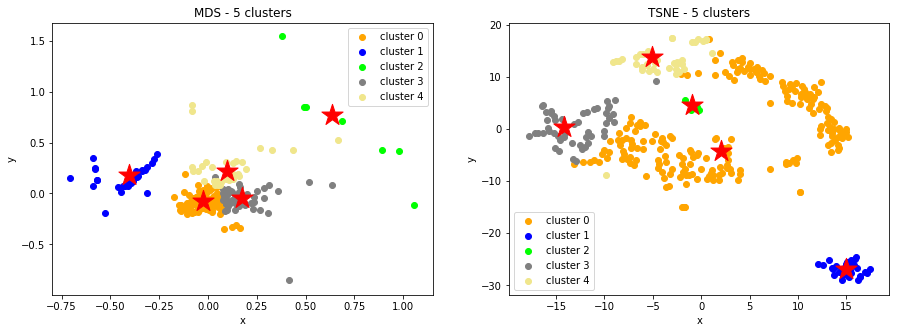

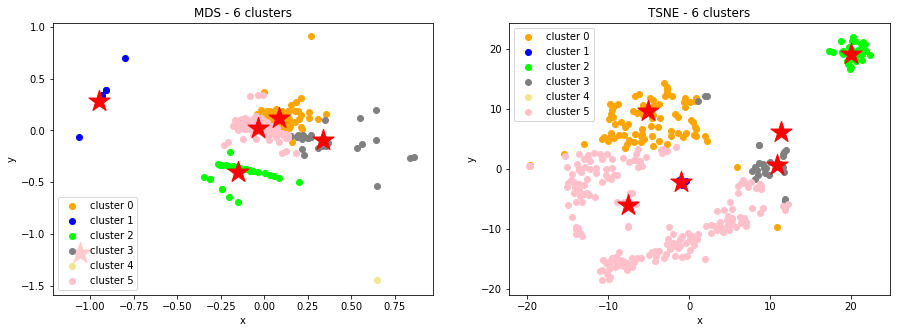

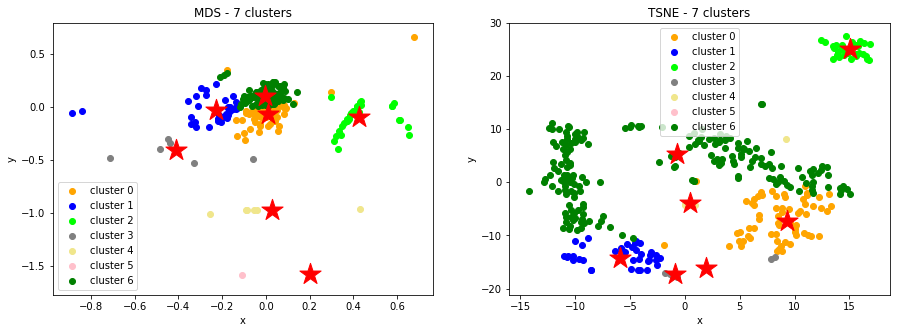

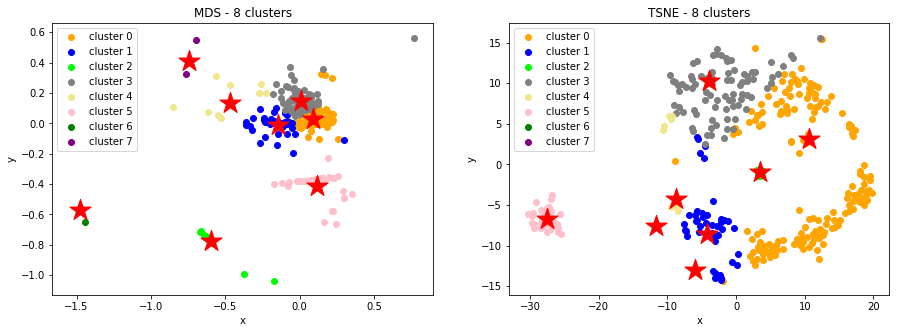

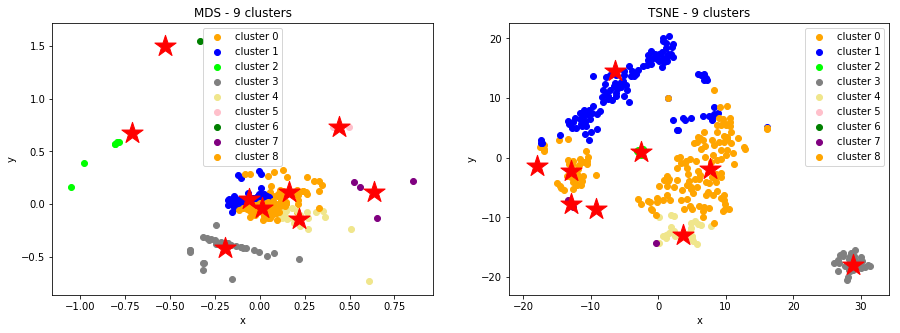

In [10]:
k_means_cache = []

for k in range(1, max_nb_cluters):
    # Run KMeans algorithm
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df_data)
    k_means_cache.append(clustered_data_sklearn)
    
    # Create new array composed of data + k centers 
    df_data_and_centers = np.r_[df_data,clustered_data_sklearn.cluster_centers_]

    f, axs = plt.subplots(1, 2, figsize=(15, 5))

    # MDS
    plt.subplot(1, 2, 1)
    XYcoordinates = manifold.MDS(n_components=2).fit_transform(df_data_and_centers)
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_, 
                           centers=XYcoordinates[-k:,:], 
                           title='MDS - ' + str(k) + ' clusters')

    # TSE
    plt.subplot(1, 2, 2)
    XYcoordinates = manifold.TSNE(n_components=2).fit_transform(df_data_and_centers)
    clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_,
                           centers=XYcoordinates[-k:,:], 
                           title='TSNE - ' + str(k) + ' clusters')

    plt.show()


In [11]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
0,2483,2466.0,90,180,0,2
1,4917,0.0,130,360,0,2
2,4106,0.0,40,180,1,3
3,3859,3300.0,142,180,1,3
4,6417,0.0,157,180,1,3


In [12]:
df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
327,5417,4196.0,267,360,1,4
328,16666,0.0,275,360,1,0
329,10750,0.0,312,360,1,0
330,5955,5625.0,315,360,1,4
331,6133,3906.0,324,360,1,4


In [13]:
#df.groupby('cluster').mean()
df.groupby('cluster').mean().sort_values(by=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], ascending=False)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
6,39999.000000,0.000000,600.000000,180.000000,0.0
5,38433.000000,2375.000000,136.000000,360.000000,1.0
7,14303.000000,1433.200000,482.400000,360.000000,1.0
0,9842.000000,395.512195,210.487805,358.536585,1.0
3,5146.966667,1297.126666,116.333333,161.600000,1.0
4,5048.043478,5666.173913,216.565217,357.391304,1.0
1,4355.607143,246.143929,97.812500,360.535714,1.0
2,4013.000000,2447.833333,140.666667,330.000000,0.0
8,3146.794643,2293.625000,130.258929,362.678571,1.0


References: 
  * https://scikit-learn.org/stable/modules/manifold.html

#### The manifolds used are as follows:
  * **MDS**: multi-dimensional scaling uses similarity to plot points that are near to each other close in the embedding.
  * **t-SNE**: converts the similarity of points into probabilities then uses those probabilities to create an embedding.

#### Looking at the cluster graphs we can see that:
  
  * It is difficult to identify clusters simply by looking at the density of the points on the 2d plot. 
  * Colorization of the reduced output (via MDS/TSNE) from the KMeans clustering greatly helps in visualiasing the clusters.
  * The plots generated by MDS and TSNE, two dimensionality reduction techniques, are very different in appearance even though they represent the same data. 


#### Looking at the above tables we can see that 
  * the higher the sum of the `ApplicantIncome` and `CoapplicantIncome`, the higher the `LoanAmount`
  * the bank loans large amount of money even if there is no `Credit_History`
  * assuming that the loan terms are expressed in months, the terms are between 13 and 30  years.
  * it is possible to get a large loan (600) with a short loan term (180) and have no co-applicant nor credit history, as show by custer 6

# Task 2

##   2.1 Plot
*Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. If these methods suggest a different value of k (from the one you used in Task 1), then compute a new k-Means clustering.*

### Leveraging inertias metrics to find best k

k:0, inertia:27.287863801543914:
k:1, inertia:20.222308926176684:
k:2, inertia:14.041065598451198:
k:3, inertia:10.51051451404549:
k:4, inertia:9.059462588340399:
k:5, inertia:7.72366522281092:
k:6, inertia:6.629365017090771:
k:7, inertia:5.662750391333858:
k:8, inertia:4.966442782308818:
all_inertias:{} [27.287863801543914, 20.222308926176684, 14.041065598451198, 10.51051451404549, 9.059462588340399, 7.72366522281092, 6.629365017090771, 5.662750391333858, 4.966442782308818]


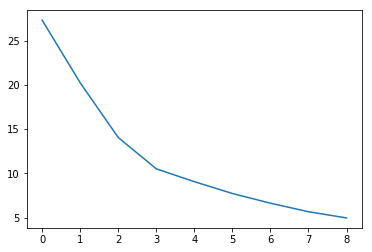

In [14]:
all_inertias = []
for kmean in range(len(k_means_cache)): 
    print("k:{}, inertia:{}:".format(kmean, k_means_cache[kmean].inertia_ ))
    all_inertias.append(k_means_cache[kmean].inertia_)
    
print("all_inertias:{}", all_inertias)
plt.plot(all_inertias)

We can see an elbow for k=3. Since k starts at 0 is for a cluster of 1, then the elbow is for nb_cluster = 4

<span style="color:red">TODO: Add labels & Title</span>


### Using the derivative of the point-to-center distance to find best k
Here we manually calculate the distance between points and their respective center.

Reference: http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/


all_distances: [0.20655356071245645, 0.18908037409626496, 0.15600669330231778, 0.13299660268011093, 0.12190208416352281, 0.11693140137349857, 0.11097715833898063, 0.1037153660474741, 0.09445524550936232]


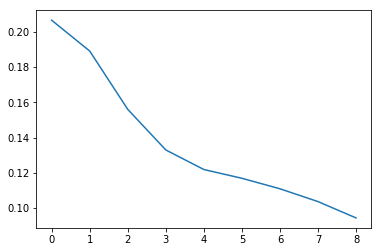

In [15]:
def create_scaled_df(clustered_data_sklearn, nb_clusters):
    scaled_df = pd.DataFrame(df_data, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
    scaled_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
    scaled_df['nb_clusters'] = nb_clusters
    return scaled_df


def get_centers_for_cluster(row):
    nb_clusters = int(row['nb_clusters'])
    cluster = int(row['cluster'])
   
    return k_means_cache[nb_clusters].cluster_centers_[cluster]


def calculate_distance(row):
    centers = row['centers']
    
    distance = math.pow((row['ApplicantIncome'] - centers[0]),2)
    distance += math.pow((row['CoapplicantIncome'] - centers[1]),2)
    distance += math.pow((row['LoanAmount'] - centers[2]),2)
    distance += math.pow((row['Loan_Amount_Term'] - centers[3]),2)
    distance += math.pow((row['Credit_History'] - centers[4]),2)
    distance = math.sqrt(distance)

    return distance


def get_mean_distances():
    distances = []
    for kmean in range(len(k_means_cache)):
        current_k = kmean
        sdf = create_scaled_df(k_means_cache[kmean], kmean)
        sdf['centers'] = sdf.apply(get_centers_for_cluster, axis=1)
        sdf['distance'] = sdf.apply(calculate_distance, axis=1)
        distances.append(sdf['distance'].mean())

    return distances

all_distances = get_mean_distances()
plt.plot(get_mean_distances())
print("all_distances:", all_distances)


The above plot shows an elbow with k = 3+1 = 4
Let's plot the derivative to figure out more precisely how the slope of this curve behaves.

[-0.01747319 -0.03307368 -0.02301009 -0.01109452 -0.00497068 -0.00595424
 -0.00726179 -0.00926012]


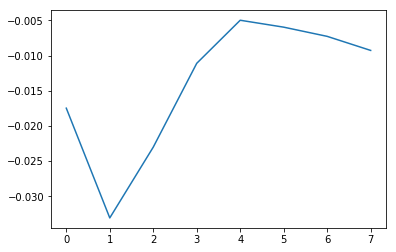

In [16]:
from numpy import diff
dx = 1
y = all_distances
dy = diff(y)/dx
print(dy)
plt.plot(dy)


We can see that the slope is negative but that around 4 is suddenly ceases to decrease. Since for slope is nearly the same for x=4,5,6, the elbow must be before that point at x=3. Since the index starts at 0, we can conclude that the elbow is obtained with **4 clusters**.

## Using the silhouette algorithm to find the best k

  * Course resource: https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
  * Scikit resource: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


#### Regarding the stackoverflow link provided for this Etivity:
  * I am not convinced by the rationale used for identifying the best number of clusters as I feel it lacks mathematical grounds.
  * I am trying to find my own explanation for finding the best number of clusters. 

First we need to understand what are the main parameters calculated by the Silhouette algorithm:

##### Silhouette coefficient
This is the `silhouette_score` which gives the average value for all the samples and gives a perspective into the density and separation of the formed clusters.

Silhouette coefficients and their meanings:
  * A value **near +1** indicates that the sample is **far away from the neighboring clusters**. 
  * A value of **0** indicates that the sample is on or very close to the decision boundary between two neighboring clusters
  * A **negative** value indicate that those sample might have been assigned to the wrong cluster**.

##### Silhouette value
This is the silhouette scores for each sample 

For n_clusters=2, The Silhouette Coefficient is 0.5993683877939564
For n_clusters=3, The Silhouette Coefficient is 0.4962646859935564
For n_clusters=4, The Silhouette Coefficient is 0.42443241469634385
For n_clusters=5, The Silhouette Coefficient is 0.339665649048216
For n_clusters=6, The Silhouette Coefficient is 0.39661031093684435
For n_clusters=7, The Silhouette Coefficient is 0.36553423719772776
For n_clusters=8, The Silhouette Coefficient is 0.35411196860366284


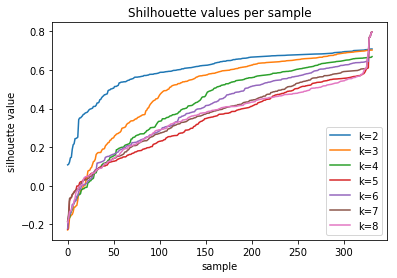

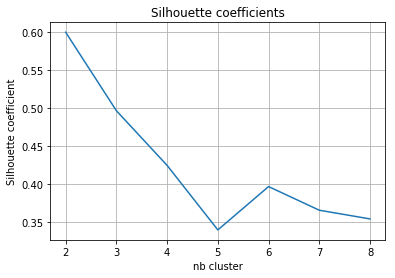

In [17]:
ks = np.arange(2, len(k_means_cache), 1)

def plot_silhouette():
    sil_coeffs = []
    for kmean in ks: 
        cluster_labels = k_means_cache[kmean].labels_

        # Silhouette score
        sil_coeff = silhouette_score(df_data, cluster_labels, metric='euclidean')
        sil_coeffs.append(sil_coeff)

        # Silhouette values
        sample_silhouette_values = silhouette_samples(df_data, cluster_labels)
        sample_silhouette_values.sort()

        plt.plot(np.arange(len(sample_silhouette_values)), sample_silhouette_values, label="k=" + str(kmean))
        plt.legend(loc="best")
        plt.xlabel('sample')
        plt.ylabel('silhouette value')
        plt.title("Shilhouette values per sample")

        print("For n_clusters={}, The Silhouette Coefficient is {}".format(kmean, sil_coeff))    
    
    return sil_coeffs;

# Plot silhouette values
sil_coeffs = plot_silhouette()
plt.show()

# Plot silhouette coeff
plt.plot(ks, sil_coeffs, label="Silhouette coeff.")
plt.title("Silhouette coefficients")
plt.xlabel('nb cluster')
plt.ylabel('Silhouette coefficient')
plt.grid(True)
plt.show()



#### Reflection
The **"Silhouette coefficient"** plot directly above indicates that 5 clusters gives the an average silhouette coefficient the closest to zero. 
This means that a lot of points are closest to the boudary between 2 neighbours.

Looking at the **"Silhouette value per sample"** plot above, we see that for 5 and more clusters there are a small number samples with high coefficient. This would indicate tiny and dense clusters. 

I prefer selecting less clusters but with a more consistent shilhouette values, which is way I would say that 4 is the correct number of clusters shown by the samples.

### Re-run the cluster algorithm

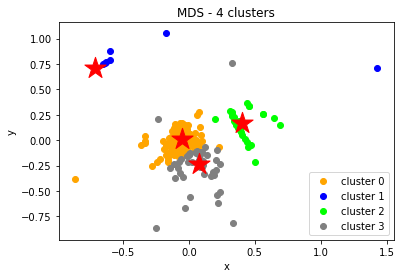

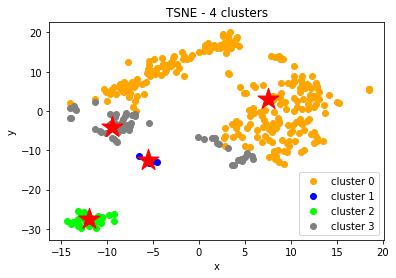

In [18]:
k = 4
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df_data)
df_data_and_centers = np.r_[df_data, clustered_data_sklearn.cluster_centers_]    

XYcoordinates = manifold.MDS(n_components=2).fit_transform(df_data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_, 
                           centers=XYcoordinates[-k:,:], 
                           title='MDS - ' + str(k) + ' clusters')
plt.show()

XYcoordinates = manifold.TSNE(n_components=2).fit_transform(df_data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_,
                           centers=XYcoordinates[-k:,:], 
                           title='TSNE - ' + str(k) + ' clusters')
plt.show()

## 2.2. Other clustering algorithm
*Use another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it.*

Reference:

I took **Martin Power's** code as an example and tried to build from it.

  * Clustering: https://scikit-learn.org/stable/modules/clustering.html
  * Manifold: https://scikit-learn.org/stable/modules/manifold.html
  * Mean shift: 
      * https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift
      * https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py


### Mean shift algorithm

In [19]:
from sklearn.cluster import MeanShift

bandwidth = cluster.estimate_bandwidth(df_data, quantile=0.9)

# Mean shift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=False, cluster_all=True)
model = mean_shift.fit(df_data)

# Extract Mean shift data
ms_labels = mean_shift.labels_
ms_cluster_centers = mean_shift.cluster_centers_
ms_labels_unique = np.unique(ms_labels)
ms_n_clusters_ = len(ms_labels_unique)

# Add centers column to data set
ms_scale_data_and_centers = np.r_[df_data, mean_shift.cluster_centers_]

print("Mean shift clusters : %d" % ms_n_clusters_)

Mean shift clusters : 5


The manifolds used are as follows:
  * **Spectral Embedding** (SE) is a discrete approximation of the low dimensional manifold using a graph representation.
  * **Locally Linear Embedding** (LLE) uses many local linear decompositions to preserve globally non-linear structures.
  * **Isomap** seeks a lower dimensional embedding that maintains geometric distances between each instance.

In [20]:
def plot_using_new_manifolds(n_clusters, n_neighbors,plot_data, plot_labels, n_components=2, random_state=0):
    
    plt.subplots(1, 3, figsize=(15, 5))
    
    # Spectral Embedding 
    plt.subplot(1,3,1)
    XYcoordinates = manifold.SpectralEmbedding(n_components=n_components,n_neighbors=n_neighbors,random_state=random_state).fit_transform(plot_data)
    clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                       labels=plot_labels, 
                       centers=XYcoordinates[-n_clusters:,:], 
                       title='Spectral Embedding')
    
    # Locally Linear Embedding
    plt.subplot(1,3,2)
    XYcoordinates = manifold.LocallyLinearEmbedding(n_components=n_components,n_neighbors=n_neighbors,random_state=random_state).fit_transform(plot_data)
    clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                       labels=plot_labels,
                       centers=XYcoordinates[-n_clusters:,:], 
                       title='Locally Linear Embedding')

    # IsoMap
    plt.subplot(1,3,3)
    XYcoordinates = manifold.Isomap(n_neighbors, n_components).fit_transform(plot_data)
    clustering_scatterplot(points=XYcoordinates[:-n_clusters,:], 
                       labels=plot_labels,
                       centers=XYcoordinates[-n_clusters:,:], 
                       title='Isomap')



    # Plot graphs
    plt.show()

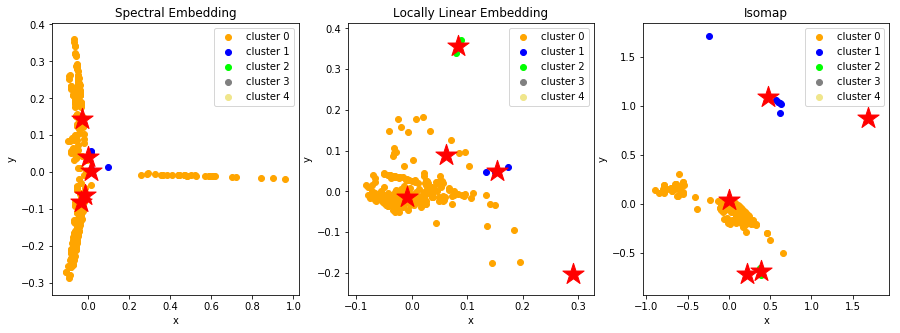

In [21]:
plot_using_new_manifolds(ms_n_clusters_, 10, ms_scale_data_and_centers, mean_shift.labels_, n_components=2) 

## 2.3. Discussion
*Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words) and by visualising the clusterings with an appropriate manifold-learning technique.*

References: 
  * http://jamesxli.blogspot.com/2012/03/on-mean-shift-and-k-means-clustering.html?_sm_au_=iSV2ZR5778f2SDQP
  * https://www.scikit-yb.org/en/latest/api/features/manifold.html

#### Bandwith 
I was surprised by the number of clusters that the ShiftMean found compared to the KMeans algorithm.  This is due in large part to the Bandwith parameter and more precisely to the quantile parameter used to calculate it.

  * The lower the quantile, the higher the number of clusters.

  * If no bandwidth parameter is given to the MeanShift one will be calculated and will result in **16** clusters.


|  Bandwidth quantile | nb cluster        |
| -------------       |:-------------     |
| 0.1                 |   18              |
| 0.2                 |   17              |
| 0.3                 |   16              |
| 0.4                 |   15              |
| 0.5                 |   12              |
| 0.6                 |   10              |
| 0.7                 |   9               |
| 0.8                 |   7               |
| 0.9                 |   5               |

For the exercise I have chosen a high quantile value (0.9) which translates to a relatively low number of clusters (5)

I find that the KMeans associated with MDS and TSNE produces 2D plots that are better at representing clusters than MeanShift with LLE, SE or Isomap. 


|  Critria       | KMeans        | Mean SHift  |
| -------------  |:------------- | ----- |
| Base algorithm | extract features based on Mean vector operation | ditto |
| Speed          | O(kN)         |  O(kN2) |
| Finding best k | Multiple steps: <ul><li>Run KMeans algorithm multiple times for different number of clusters</li><li> Plot euclidian distance and find elbow </li></ul>     |  <ul><li>Number of clusters found by the algorithm.</li><li>Algorithms finds a larger number of clusters than KMeans</li></ul>| 
| Data | Does not seem to work well on non-convex data | Needs clear gradients to locate cluster centers |



